In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [4]:


def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    N= y.shape[0]
    error = y - np.dot(tx, w)
    loss = 1/(2*N) * np.dot(error.T, error)
    return loss
    # ***************************************************

# Code for testing
w = np.array([2,1])
print(w.shape)
loss = compute_loss(y, tx, w)
print(loss)

(2,)
2634.6691563199684


# 2. Grid Search

Fill in the function `grid_search()` below:

In [5]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            losses[i][j] = compute_loss(y, tx, np.array([w0, w1]))
    # ***************************************************
    # raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.104 seconds


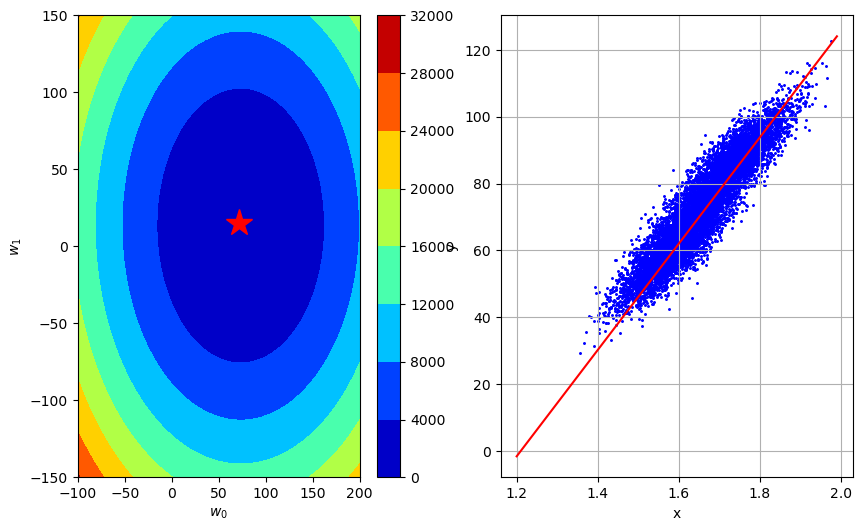

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

==Note by Yaooo ==
It seems that the larger the grid spacing the better the result.

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    N = y.shape[0]
    constant = -1/N
    e = y - tx@w
    grad = constant * tx.T@e
    return grad
    # ***************************************************

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        # raise NotImplementedError
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient

        ## w as type of float
        # w = w.astype('float64')
        w = w - gamma*gradient
        # ***************************************************
        # raise NotImplementedError
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591674, w0=51.30574540147362, w1=9.435798704492273
GD iter. 1/49: loss=265.3024621089603, w0=66.69746902191571, w1=12.266538315839995
GD iter. 2/49: loss=37.87837955044128, w0=71.31498610804834, w1=13.115760199244328
GD iter. 3/49: loss=17.410212120174467, w0=72.70024123388814, w1=13.37052676426563
GD iter. 4/49: loss=15.568077051450459, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=15.402284895265298, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136332, w1=13.476764421879516
GD iter. 7/49: loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.385899822261674, w0=73.29247935783843, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638307, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=15.385887965652202, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305071, w1=13.479705271317192


In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [11]:
ex3b = compute_gradient(y, tx, np.array([100, 20]))
print(ex3b)
ex3b = compute_gradient(y, tx, np.array([50, 10]))
print(ex3b)

[26.706078    6.52028757]
[-23.293922    -3.47971243]


In [12]:
# exercise 3c
loss_final = gd_losses[-1]
print(f'final loss: {loss_final}')

final loss: 15.385887868829402


The converging speed is fast
the cost is minimized.

In [13]:
# exercise 3d
step_size_test_set = [0.001, 0.01, 0.5, 1, 2, 2.5]
w_test_set = [np.array([0, 0]), np.array([100, 10]), np.array([-1000, 1000])]
for step_size in step_size_test_set:
    for w_test in w_test_set:
        gd_losses, gd_ws = gradient_descent(y, tx, w_test, max_iters, step_size)
        print(f'with initialization w: {w_test} and step size: {step_size} \n the losses is: {gd_losses} and the final w is: {gd_ws[-1]}\n\n')

GD iter. 0/49: loss=2792.2367127591674, w0=0.07329392200210517, w1=0.013479712434988961
GD iter. 1/49: loss=2786.685787960211, w0=0.14651455008220826, w1=0.026945945157542943
GD iter. 2/49: loss=2781.145959459929, w0=0.21966195753423123, w1=0.04039871164737437
GD iter. 3/49: loss=2775.617205076818, w0=0.2927362175788022, w1=0.05383802537071597
GD iter. 4/49: loss=2770.099502673719, w0=0.3657374033633285, w1=0.06726389978033424
GD iter. 5/49: loss=2764.592830157724, w0=0.43866558796207034, w1=0.08067634831554286
GD iter. 6/49: loss=2759.097165480089, w0=0.5115208443762135, w1=0.09407538440221627
GD iter. 7/49: loss=2753.612486636144, w0=0.5843032455339424, w1=0.10746102145280306
GD iter. 8/49: loss=2748.138771665208, w0=0.6570128642905136, w1=0.12083327286633921
GD iter. 9/49: loss=2742.675998650499, w0=0.7296497734283283, w1=0.13419215202846188
GD iter. 10/49: loss=2737.224145719047, w0=0.8022140456570052, w1=0.1475376723114224
GD iter. 11/49: loss=2731.783191041604, w0=0.8747057536134

# 4. Stochastic gradient descent

In [14]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    batch_iter(y, tx, batch_size=4)
    grad = compute_gradient(y, tx, w)
    return grad
    # ***************************************************
    # raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        loss = compute_loss(y, tx, w)
        losses.append(loss)
        # w = w.astype('float64')
        w = w - gamma*compute_stoch_gradient(y, tx, w)
        ws.append(w)
        # ***************************************************
        # raise NotImplementedError

        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [15]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2792.2367127591674, w0=7.329392200210518, w1=1.3479712434988962
SGD iter. 1/49: loss=2264.635056030003, w0=13.925845180399978, w1=2.5611453626479057
SGD iter. 2/49: loss=1837.2777140793808, w0=19.862652862570503, w1=3.653002069882014
SGD iter. 3/49: loss=1491.1182670993755, w0=25.205779776523975, w1=4.635673106392712
SGD iter. 4/49: loss=1210.7291150455717, w0=30.014593999082095, w1=5.520077039252342
SGD iter. 5/49: loss=983.6139018819908, w0=34.3425267993844, w1=6.3160405788260086
SGD iter. 6/49: loss=799.6505792194903, w0=38.23766631965648, w1=7.0324077644423095
SGD iter. 7/49: loss=650.6402878628645, w0=41.74329188790135, w1=7.677138231496979
SGD iter. 8/49: loss=529.9419518639982, w0=44.89835489932173, w1=8.257395651846183
SGD iter. 9/49: loss=432.17629970491606, w0=47.737911609600076, w1=8.779627330160466
SGD iter. 10/49: loss=352.98612145605966, w0=50.29351264885059, w1=9.249635840643322
SGD iter. 11/49: loss=288.8420770744859, w0=52.59355358417605, w1=9.6726

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

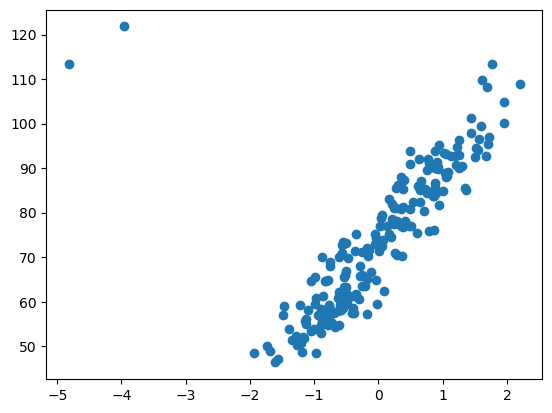

In [17]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************
# raise NotImplementedError

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
# Visualization
plt.scatter(x, y)


In [18]:
y.shape, tx.shape

((202,), (202, 2))

In [19]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points 
#       and the model fit

losses, ws = gradient_descent(y, tx, initial_w=w_initial, max_iters=max_iters, gamma=gamma)
# ***************************************************
# raise NotImplementedError


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.847464098448434, w1=7.724426406192428
GD iter. 1/49: loss=318.2821247015961, w0=67.40170332798299, w1=10.041754328050118
GD iter. 2/49: loss=88.6423556165127, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574596
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248088, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249237, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.03488900159354
GD iter

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [21]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # w.astype('float64')
    N = y.shape[0]
    error = y - tx.dot(w)
    grad = np.zeros(w.shape)
    grad = -tx.T@np.sign(error)/N

    # ***************************************************
    return grad

In [22]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        sub_grad = compute_subgradient_mae(y, tx, w)
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # w.astype('float64')
        # sub_grad.astype('float64')
        print()
        w = w - gamma*sub_grad
        # ***************************************************
        # raise NotImplementedError
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [23]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))


SubGD iter. 0/499: loss=2869.8351145358524, w0=0.7, w1=6.109524327590712e-16

SubGD iter. 1/499: loss=2818.2326504374037, w0=1.4, w1=1.2219048655181425e-15

SubGD iter. 2/499: loss=2767.120186338956, w0=2.0999999999999996, w1=1.832857298277214e-15

SubGD iter. 3/499: loss=2716.4977222405073, w0=2.8, w1=2.443809731036285e-15

SubGD iter. 4/499: loss=2666.365258142059, w0=3.5, w1=3.054762163795356e-15

SubGD iter. 5/499: loss=2616.722794043611, w0=4.2, w1=3.665714596554428e-15

SubGD iter. 6/499: loss=2567.570329945162, w0=4.9, w1=4.276667029313499e-15

SubGD iter. 7/499: loss=2518.9078658467133, w0=5.6000000000000005, w1=4.887619462072571e-15

SubGD iter. 8/499: loss=2470.735401748265, w0=6.300000000000001, w1=5.498571894831642e-15

SubGD iter. 9/499: loss=2423.052937649816, w0=7.000000000000001, w1=6.109524327590714e-15

SubGD iter. 10/499: loss=2375.8604735513677, w0=7.700000000000001, w1=6.720476760349785e-15

SubGD iter. 11/499: loss=2329.1580094529195, w0=8.4, w1=7.331429193108857

In [24]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [28]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        loss = compute_loss(y, tx, w)
        sub_grad = compute_subgradient_mae(y, tx, w)
        w = w - sub_grad*gamma
        losses.append(loss)
        ws.append(w)
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [29]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=2869.8351145358524, w0=0.7, w1=6.109524327590712e-16
SubSGD iter. 1/499: loss=2818.2326504374037, w0=1.4, w1=1.2219048655181425e-15
SubSGD iter. 2/499: loss=2767.120186338956, w0=2.0999999999999996, w1=1.832857298277214e-15
SubSGD iter. 3/499: loss=2716.4977222405073, w0=2.8, w1=2.443809731036285e-15
SubSGD iter. 4/499: loss=2666.365258142059, w0=3.5, w1=3.054762163795356e-15
SubSGD iter. 5/499: loss=2616.722794043611, w0=4.2, w1=3.665714596554428e-15
SubSGD iter. 6/499: loss=2567.570329945162, w0=4.9, w1=4.276667029313499e-15
SubSGD iter. 7/499: loss=2518.9078658467133, w0=5.6000000000000005, w1=4.887619462072571e-15
SubSGD iter. 8/499: loss=2470.735401748265, w0=6.300000000000001, w1=5.498571894831642e-15
SubSGD iter. 9/499: loss=2423.052937649816, w0=7.000000000000001, w1=6.109524327590714e-15
SubSGD iter. 10/499: loss=2375.8604735513677, w0=7.700000000000001, w1=6.720476760349785e-15
SubSGD iter. 11/499: loss=2329.1580094529195, w0=8.4, w1=7.331429193108857

In [30]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))


interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>